In the following, the Huffman algorithm to find the optimal one-shot source code is implemented. We assume that we have a memoryless source, modeled by a sequence of i.i.d. random variables, sampled from a known distribution $P_X$. From information-theoretical results, we know that for the average codeword length $\bar{L}_{\mathrm{opt}}$ of an optimal code, we have
$$ H(X)\le \bar{L}_{\mathrm{opt}} < H(X)+1.$$

In the following, we will show that by increasing the block length, one can construct a source code with average length per symbol, which is arbitrarily close to $H(X)$.

In [1]:
import numpy as np
import matplotlib.pyplot as pyplot
import sys
sys.setrecursionlimit(15000)
print(sys.getrecursionlimit())

15000


In [2]:
def H(p):
    # p is a non-negative numpy vector that sums to 1.
    # Returns the entropy of distribution p.
    
    log2 = np.log2
    ent = 0
    for i in np.arange(len(p)):
        if p[i] != 0:
            ent = ent -p[i]*log2(p[i])
            
    return ent

In [3]:
def Huffman(p):
    # Input:
    # 'p' is a numpy vector that gives the input distibution over a set of variables.
    # Output:
    # This function find a binary Huffman code for a given distribution
#    assert(np.sum(p) == 1.0)
#    assert(len(symb_list) == len(p))
    ell = len(p) # Alphabet size (length of p)
    
#    print('Huffman for distribution:',p)
    
    if (ell > 2):
        srt_indx = np.argsort(p)
        srt_indx = srt_indx[::-1] # Reverse the order of indices
        
        p = p[srt_indx] # Sort probabilities from largest to smallest values.
        p_new = np.hstack((p[0:ell-2],p[ell-2]+p[ell-1])) # Merge two least probable probabilities
#        symb_list_new = [symb_list[i] for i in srt_indx[0:ell-2]]
#        symb_list_new.append(symb_list[srt_indx[ell-2]]+'_'+symb_list[srt_indx[ell-1]]) # Merge two least probable symbols

#        print(srt_indx)
#        print(p)
#        print(p_new)
#        print(symb_list)
#        print(symb_list_new)

#        code = Huffman(symb_list_new, p_new)
        code = Huffman(p_new)
#        print(code)
        code_new = code[0:len(code)-1]
        code_new.append(code[-1]+'0')
        code_new.append(code[-1]+'1')
        inv_srt_indx = np.arange(len(srt_indx))[np.argsort(srt_indx)] # Find the inverse of permutation 'srt_indx'
        code_new = [code_new[i] for i in inv_srt_indx[:]]
    else:
        code_new = ['0', '1']
    
    return code_new

In [4]:
def Huffman_avg_length(p):
    ell = len(p) # Alphabet size (length of p)
    code = Huffman(p)
    
    avg_len = 0
    for i in np.arange(ell):
        avg_len += p[i]*len(code[i])
        
    return avg_len

In [5]:
# Test Huffman() and Huffman_avg_length() functions.
p = np.array([0.5,0.25,0.125,0.125])
print(p.sum())
print(Huffman(p))
print(p)
print(Huffman_avg_length(p))
print(H(p))

1.0
['0', '11', '101', '100']
[0.5   0.25  0.125 0.125]
1.75
1.75


In [6]:
def dist_cartesian_prod(p,bl):
    # Considering a distribution 'p' over some alphabet, this function computes
    #     the distribution over a Cartesian product of alphabet set with itself, 'k' times.
    # Input:
    # 'p' is a distribution over an alphabet set. 'p' should be a Numpy vector.
    # 'bl' determines the number of Cartesian products (i.e., block length used in Huffman coding)

    p_cartesian = p
    if (bl >= 2):
        for itr in range(bl-1):
            cur_alphabet_size = len(p_cartesian) # Current alphabet size (number of elements in p_cartesian vector)
            p_tmp = np.zeros(cur_alphabet_size*len(p))
            for i in range(cur_alphabet_size):
                for j in range(len(p)):
                    p_tmp[i*len(p)+j] = p_cartesian[i]*p[j]
            p_cartesian = p_tmp

    return p_cartesian

Entropy of source is: 2.1464393446710153
[1, 2, 3, 4, 5]
[2.2, 2.1649999999999996, 2.1588333333333307, 2.1531843750000017, 2.153466999999996]


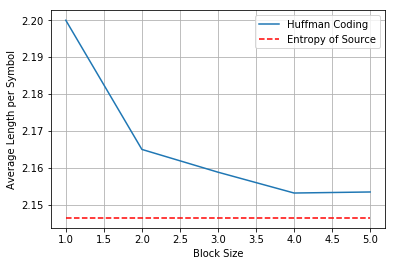

In [7]:
p = np.array([0.4,0.2,0.15,0.1,0.15])

print('Entropy of source is:',H(p))

max_blk_length = 5

blk_size = []
avg_len = []
for bl in range(1,max_blk_length+1):
    blk_size.append(bl)
    avg_len.append(Huffman_avg_length(dist_cartesian_prod(p,bl))/bl)
        
print(blk_size)
print(avg_len)

pyplot.plot(blk_size,avg_len, label='Huffman Coding')
pyplot.plot([1,5],[H(p),H(p)], 'r--', label='Entropy of Source')
pyplot.xlabel('Block Size')
pyplot.ylabel('Average Length per Symbol')
pyplot.legend()
pyplot.grid(True)
pyplot.show()


Entropy of source is: 1.4854752972273344
[1, 2, 3, 4, 5, 6, 7, 8]
[1.5, 1.4999999999999998, 1.4956666666666665, 1.4930749999999993, 1.491488, 1.4904721666666674, 1.4897157142857045, 1.489153925000079]


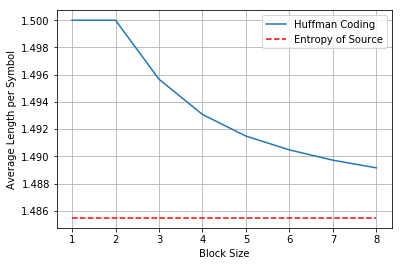

In [8]:
p = np.array([0.5,0.2,0.3])

print('Entropy of source is:',H(p))

max_blk_length = 8

blk_size = []
avg_len = []
for bl in range(1,max_blk_length+1):
    blk_size.append(bl)
    avg_len.append(Huffman_avg_length(dist_cartesian_prod(p,bl))/bl)
        
print(blk_size)
print(avg_len)

pyplot.plot(blk_size,avg_len, label='Huffman Coding')
pyplot.plot([1,8],[H(p),H(p)], 'r--', label='Entropy of Source')
pyplot.xlabel('Block Size')
pyplot.ylabel('Average Length per Symbol')
pyplot.legend()
pyplot.grid(True)
pyplot.show()


Entropy of source is: 0.9927744539878083
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[1.0, 1.0, 1.0000000000000002, 0.9999046875000003, 0.9981355625000002, 0.9976630677083338, 0.9968490897321435, 0.9965364488134772, 0.9959800472678005, 0.9958041081991391, 0.9953765153813031, 0.9952924069794826, 0.9949358645995083]


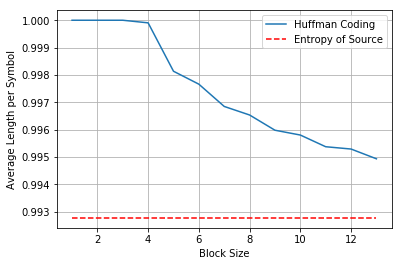

In [9]:
p = np.array([0.55,0.45])

print('Entropy of source is:',H(p))

max_blk_length = 13

blk_size = []
avg_len = []
for bl in range(1,max_blk_length+1):
    blk_size.append(bl)
    avg_len.append(Huffman_avg_length(dist_cartesian_prod(p,bl))/bl)
        
print(blk_size)
print(avg_len)

pyplot.plot(blk_size,avg_len, label='Huffman Coding')
pyplot.plot([1,13],[H(p),H(p)], 'r--', label='Entropy of Source')
pyplot.xlabel('Block Size')
pyplot.ylabel('Average Length per Symbol')
pyplot.legend()
pyplot.grid(True)
pyplot.show()


Entropy of source is: 0.7219280948873623
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[1.0, 0.7800000000000001, 0.7280000000000002, 0.7408, 0.7379200000000004, 0.725248, 0.7317558857142866, 0.7322281599999979, 0.7251398542222266, 0.7282013184000065, 0.7296009532509327, 0.7250406980266938, 0.7262139535675087]


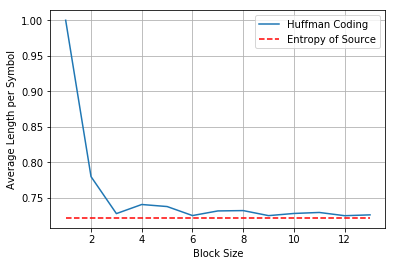

In [10]:
p = np.array([0.8,0.2])

print('Entropy of source is:',H(p))

max_blk_length = 13

blk_size = []
avg_len = []
for bl in range(1,max_blk_length+1):
    blk_size.append(bl)
    avg_len.append(Huffman_avg_length(dist_cartesian_prod(p,bl))/bl)
        
print(blk_size)
print(avg_len)

pyplot.plot(blk_size,avg_len, label='Huffman Coding')
pyplot.plot([1,13],[H(p),H(p)], 'r--', label='Entropy of Source')
pyplot.xlabel('Block Size')
pyplot.ylabel('Average Length per Symbol')
pyplot.legend()
pyplot.grid(True)
pyplot.show()


Entropy of source is: 0.4689955935892812
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[1.0, 0.645, 0.5326666666666667, 0.4925500000000001, 0.4801940000000001, 0.47015683333333347, 0.47434155714285725, 0.47579935125000006, 0.47499808211111133, 0.4766911941900001, 0.47327935997272647, 0.4699766737605813, 0.47136993188902154]


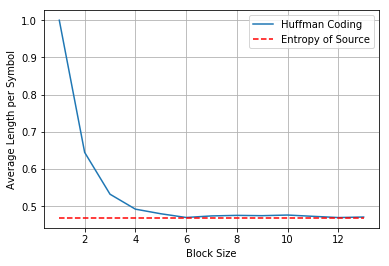

In [11]:
p = np.array([0.1,0.9])

print('Entropy of source is:',H(p))

max_blk_length = 13

blk_size = []
avg_len = []
for bl in range(1,max_blk_length+1):
    blk_size.append(bl)
    avg_len.append(Huffman_avg_length(dist_cartesian_prod(p,bl))/bl)
        
print(blk_size)
print(avg_len)

pyplot.plot(blk_size,avg_len, label='Huffman Coding')
pyplot.plot([1,13],[H(p),H(p)], 'r--', label='Entropy of Source')
pyplot.xlabel('Block Size')
pyplot.ylabel('Average Length per Symbol')
pyplot.legend()
pyplot.grid(True)
pyplot.show()
